In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv("emotion2.csv")

In [11]:
print(data.shape)

(1782, 5)


In [12]:
data.head()

,SYSTOLIC_PRESSURE,DIASTOLIC_PRESSURE,HEART_RATE,BLOOD_VISCOSITY,EMOTION
0,142.0,91.0,83.0,0.401894,STRESSED
1,NaN,92.0,113.0,0.364193,ANGRY
2,171.0,91.0,104.0,0.381117,ANGRY
3,135.0,91.0,83.0,0.346678,DEPRESSED
4,154.0,98.0,116.0,0.392839,ANGRY


In [13]:
data

,SYSTOLIC_PRESSURE,DIASTOLIC_PRESSURE,HEART_RATE,BLOOD_VISCOSITY,EMOTION
0,142.0,91.0,83.0,0.401894,STRESSED
1,NaN,92.0,113.0,0.364193,ANGRY
2,171.0,91.0,104.0,0.381117,ANGRY
3,135.0,91.0,83.0,0.346678,DEPRESSED
4,154.0,98.0,116.0,0.392839,ANGRY
...,...,...,...,...,...
1777,122.0,79.0,62.0,0.330611,HAPPY
1778,154.0,89.0,78.0,0.329645,DEPRESSED
1779,NaN,94.0,99.0,0.362319,ANGRY
1780,143.0,90.0,64.0,0.398557,STRESSED


In [14]:
data.isnull().sum()

SYSTOLIC_PRESSURE     27
DIASTOLIC_PRESSURE    30
HEART_RATE            26
BLOOD_VISCOSITY       19
EMOTION                0
dtype: int64

In [15]:
data.dtypes

SYSTOLIC_PRESSURE     float64
DIASTOLIC_PRESSURE    float64
HEART_RATE            float64
BLOOD_VISCOSITY       float64
EMOTION                object
dtype: object

In [16]:
data['SYSTOLIC_PRESSURE'].mean()

141.9031339031339

In [17]:
data['DIASTOLIC_PRESSURE'].mean()

88.61872146118722

In [18]:
data['HEART_RATE'].mean()

81.70785876993166

In [19]:
data['BLOOD_VISCOSITY'].mean()

0.3622338361883154

In [20]:
data['SYSTOLIC_PRESSURE']=data['SYSTOLIC_PRESSURE'].fillna(data['SYSTOLIC_PRESSURE'].mean())

In [21]:
data['DIASTOLIC_PRESSURE']=data['DIASTOLIC_PRESSURE'].fillna(data['DIASTOLIC_PRESSURE'].mean())

In [22]:
data['BLOOD_VISCOSITY']=data['BLOOD_VISCOSITY'].fillna(data['BLOOD_VISCOSITY'].mean())

In [23]:
data['HEART_RATE']=data['HEART_RATE'].fillna(data['HEART_RATE'].mean())

In [24]:
data.isnull().sum()

SYSTOLIC_PRESSURE     0
DIASTOLIC_PRESSURE    0
HEART_RATE            0
BLOOD_VISCOSITY       0
EMOTION               0
dtype: int64

In [25]:
data.columns

Index(['SYSTOLIC_PRESSURE', 'DIASTOLIC_PRESSURE', 'HEART_RATE',
       'BLOOD_VISCOSITY', 'EMOTION'],
      dtype='object')

In [26]:
sp=data.iloc[:,0].values
dp=data.iloc[:,1].values
hr=data.iloc[:,2].values
bv=data.iloc[:,3].values
emotion=data.iloc[:,4].values

In [27]:
from sklearn.preprocessing import LabelEncoder
cat_var =data.dtypes.loc[data.dtypes == 'object'].index
le =LabelEncoder()
for var in cat_var:
    data[var] = le.fit_transform(data[var])

In [28]:
data

,SYSTOLIC_PRESSURE,DIASTOLIC_PRESSURE,HEART_RATE,BLOOD_VISCOSITY,EMOTION
0,142.000000,91.0,83.0,0.401894,4
1,141.903134,92.0,113.0,0.364193,0
2,171.000000,91.0,104.0,0.381117,0
3,135.000000,91.0,83.0,0.346678,1
4,154.000000,98.0,116.0,0.392839,0
...,...,...,...,...,...
1777,122.000000,79.0,62.0,0.330611,2
1778,154.000000,89.0,78.0,0.329645,1
1779,141.903134,94.0,99.0,0.362319,0
1780,143.000000,90.0,64.0,0.398557,4


In [29]:
x=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [32]:
y_train

array([3, 1, 0, ..., 4, 3, 4])

In [33]:
y_test

array([1, 3, 4, 3, 1, 4, 4, 2, 2, 1, 2, 2, 1, 3, 2, 1, 0, 4, 1, 4, 3, 4,
       4, 2, 4, 2, 4, 4, 2, 0, 0, 4, 2, 2, 1, 1, 2, 3, 2, 0, 4, 3, 3, 3,
       0, 0, 3, 4, 0, 3, 2, 3, 3, 3, 1, 3, 0, 1, 1, 4, 1, 3, 2, 4, 3, 3,
       2, 1, 3, 3, 3, 4, 4, 0, 3, 2, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 2, 1,
       3, 0])

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

c:\users\lmani_v\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lmani_v\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
model.predict(x_train)

array([2, 1, 0, ..., 4, 3, 3])

In [36]:
predicted_train = model.predict(x_train)
true_value = y_train

In [37]:
predicted_train

array([2, 1, 0, ..., 4, 3, 3])

In [38]:
from sklearn.metrics import accuracy_score
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 85.58%


In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       345
           1       0.95      0.95      0.95       375
           2       0.88      0.90      0.89       334
           3       0.68      0.69      0.69       312
           4       0.84      0.76      0.80       326

    accuracy                           0.86      1692
   macro avg       0.85      0.85      0.85      1692
weighted avg       0.86      0.86      0.85      1692

Confusion matrix
[[330  12   0   0   3]
 [  3 355   0  17   0]
 [  1   4 300  25   4]
 [ 19   0  37 215  41]
 [ 14   4   3  57 248]]


In [40]:
r2_score=model.score(x_train,y_train)

In [41]:
print(r2_score)

0.8557919621749409


In [42]:
from sklearn import metrics
print(metrics.mean_absolute_error(true_value,predicted_train))
print(metrics.mean_squared_error(true_value,predicted_train))


0.21631205673758866
0.44799054373522457


In [43]:
print(np.sqrt(metrics.mean_squared_error(true_value,predicted_train)))

0.6693209571911106


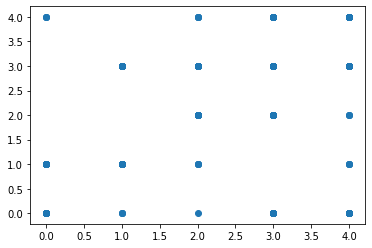

In [44]:
plt.scatter(true_value,predicted_train)

In [45]:
data=data.drop([], axis=1)
corr=data.corr()
corr

,SYSTOLIC_PRESSURE,DIASTOLIC_PRESSURE,HEART_RATE,BLOOD_VISCOSITY,EMOTION
SYSTOLIC_PRESSURE,1.000000,0.704508,0.682024,0.226140,-0.443981
DIASTOLIC_PRESSURE,0.704508,1.000000,0.602814,0.312325,-0.299666
HEART_RATE,0.682024,0.602814,1.000000,0.200625,-0.615033
BLOOD_VISCOSITY,0.226140,0.312325,0.200625,1.000000,0.515124
EMOTION,-0.443981,-0.299666,-0.615033,0.515124,1.000000


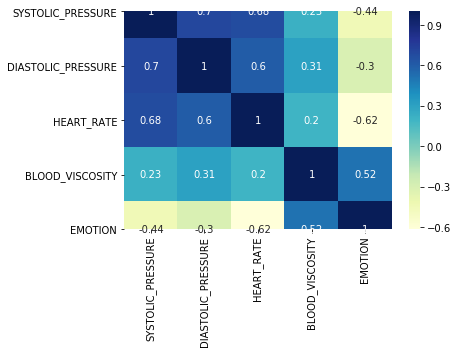

In [46]:

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap="YlGnBu",annot=True)

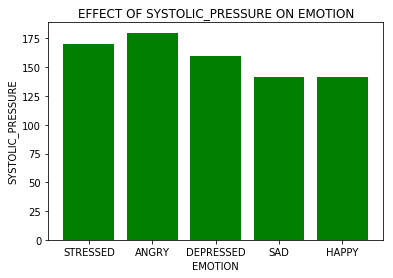

In [48]:
plt.bar(emotion,sp,color='g')
plt.ylabel('SYSTOLIC_PRESSURE', fontsize=10)
plt.xlabel('EMOTION', fontsize=10)
plt.title('EFFECT OF SYSTOLIC_PRESSURE ON EMOTION')
plt.show()

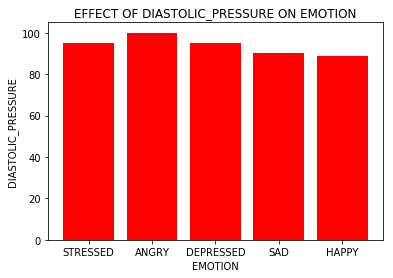

In [49]:
plt.bar(emotion,dp,color='r')
plt.ylabel('DIASTOLIC_PRESSURE', fontsize=10)
plt.xlabel('EMOTION', fontsize=10)
plt.title('EFFECT OF DIASTOLIC_PRESSURE ON EMOTION')
plt.show()

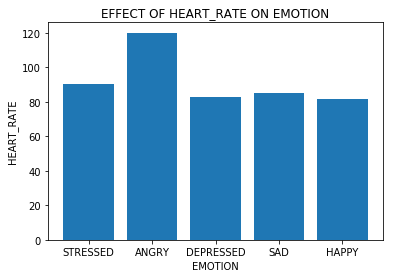

In [50]:
plt.bar(emotion,hr)
plt.ylabel('HEART_RATE', fontsize=10)
plt.xlabel('EMOTION', fontsize=10)
plt.title('EFFECT OF HEART_RATE ON EMOTION')
plt.show()

In [54]:
plt.plot(y,bv,color='')
plt.ylabel('BLOOD_VISCOSITY', fontsize=10)
plt.xlabel('EMOTION', fontsize=10)
plt.title('EFFECT OF BLOOD_VISCOSITY ON EMOTION')
plt.show()

ValueError: Invalid RGBA argument: 'yrg'

<Figure size 432x288 with 1 Axes>